<a href="https://colab.research.google.com/github/aruna-1985/aruna_akula/blob/master/crop_id_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statistics

In [2]:
from statistics import *

In [3]:

mean([50.9,20.7,30.6,40.7,50.8,60.6])

42.38333333333333

In [8]:
mode([1,1,2,3,3,3,4,4])

3

In [9]:
median([5,3,34,9,7,98,5])

7

In [10]:
pstdev([2.5,33.5,66.6,22.75,44.75])

21.435405291246536

In [11]:
stdev([2.5,33.5,66.6,22.75,44.75])

23.965511678242965

In [14]:
import numpy as np 
import pandas as pd

In [15]:
np.random.seed(52)

In [161]:
normal_soil_type  = np.random.normal(loc = 80, scale = 10,size =8000)
normal_crop_type = np.random.normal(loc= 70,scale =9,size = 8500)

In [162]:
all_types = np.concatenate((normal_soil_type,normal_crop_type),axis = 0)

In [163]:
df_ppl_mass = pd.DataFrame(data = {'crop_id':all_types})

In [164]:
df_ppl_mass.head()

,crop_id
0,85.596121
1,92.474578
2,74.867989
3,78.005361
4,81.647716


In [165]:
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, "Distribution of crop id's")

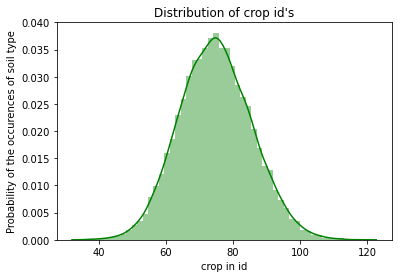

In [166]:
sns.distplot(df_ppl_mass,color = "green")
plt.xlabel("crop in id")
plt.ylabel("Probability of the occurences of soil type")
plt.title("Distribution of crop id's")

In [167]:
pop_mean_id = df_ppl_mass['crop_id'].mean()
pop_mean_id

74.7641362202094

In [168]:
pop_std_dev_id = df_ppl_mass['crop_id'].std()
pop_std_dev_id

10.725523102293046

In [169]:
## Taking Random Samples from the population 
sample_means = []
n = 25 
for sample in range(0,300):
    #Random choice with replacement
    sample_values = np.random.choice(a = df_ppl_mass['crop_id'],size = n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Text(0, 0.5, 'Frequency of occurence ')

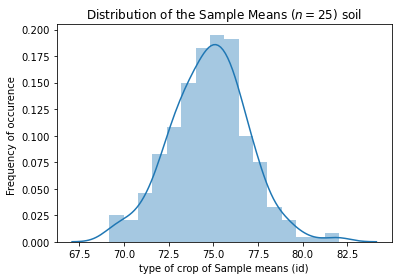

In [170]:
sns.distplot(sample_means)
plt.title("Distribution of the Sample Means $(n=25)$ soil")
plt.xlabel("type of crop of Sample means (id)")
plt.ylabel("Frequency of occurence ")

In [171]:
median_of_sample = np.median(sample_means)
median_of_sample

74.83056633153129

In [172]:
mean_of_sample = np.mean(sample_means)
mean_of_sample

74.75898845795857

In [173]:
print("The population mean is",pop_mean_id)
print("The sample mean is:",mean_of_sample)

The population mean is 74.7641362202094
The sample mean is: 74.75898845795857


In [174]:
std_dev_of_sample = np.std(sample_means)
std_dev_of_sample

2.1386536185429685

In [175]:
standard_error = pop_std_dev_id/np.sqrt(n)
standard_error

2.1451046204586093

In [132]:
 farmer_sample_mean = 94

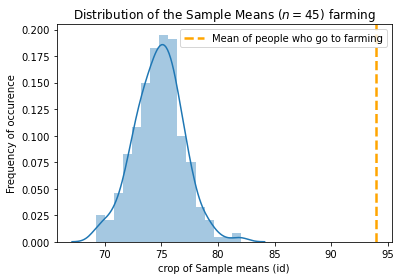

In [177]:
sns.distplot(sample_means)
plt.title("Distribution of the Sample Means $(n=45)$ farming")
plt.xlabel("crop of Sample means (id)")
plt.ylabel("Frequency of occurence")
plt.axvline(x =farming_sample_mean,linestyle = '--',linewidth = 2.5,label = 'Mean of people who go to farming',c = 'orange')
plt.legend()

In [178]:
z_score = (farming_sample_mean - mean_of_sample)/standard_error
z_score

8.969731060449552

In [179]:
import scipy.stats as stats
prop_less_than_farmer_mean = round(stats.norm.cdf(z_score),3)
prop_less_than_farmer_mean

1.0

Text(0, 0.5, 'Frequency of occurence')

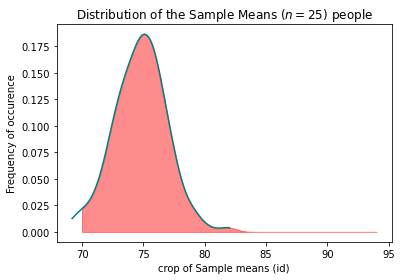

In [180]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means),np.max(sample_means),1000)
plt.plot(pos,kde(pos),color = "Teal")
shade = np.linspace(70,farming_sample_mean,300)
plt.fill_between(shade,kde(shade),alpha = 0.45,color = 'Red')

plt.title("Distribution of the Sample Means $(n=25)$ people")
plt.xlabel("crop of Sample means (id)")
plt.ylabel("Frequency of occurence")